In [4]:
def plotting_function(xs, ys, xlabel, ylabel, title, pcov, popt, plot_shape='bo', round_to=4):
    text = "If the Equation is y = mx + c\nFor the best fit curve:\n"
    text += f"    m = {round(popt[0], round_to)} ± {round((pcov[0][0])**0.5, round_to+2)}\n"
    text += f"    c = {round(popt[1], round_to)} ± {round((pcov[1][1])**0.5, round_to+2)}\n"
    print(text)
    print("The curve looks like:")
    span = max(xs) - min(xs)
    a = 0.05 # amount of free space to be shown before the least point and after the maximum
    factor = span*a

    xFit = np.arange(min(xs)-factor, max(xs)+factor, 1e-3)

    plt.plot(xs, ys, plot_shape) 
    plt.plot(xFit, straight_line(xFit, popt[0], popt[1]), 'r')

    # error lines 
    # plt.plot(xFit, func(xFit, popt[0]+((pcov[0][0])**0.5), popt[1]+((pcov[1][1])**0.5)), "b--") # "b--" means blue dashed lines                          ^                            ^
    # plt.plot(xFit, func(xFit, popt[0]-((pcov[0][0])**0.5), popt[1]-((pcov[1][1])**0.5)), "b--")

    plt.legend(["Data Points", "Least Square Fit", "Error Boundaries"])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    plt.text(0.5, 0.15, text, fontsize=12, transform=plt.gcf().transFigure)
#     plt.title(title)

In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from tabulate import tabulate

In [31]:
w1 = 21.4
w2 = 46.3
w3 = 53.6
rho = 1000*(w3-w1)/(w2-w1)
rho

1293.1726907630525

If the Equation is y = mx + c
For the best fit curve:
    m = 974.0548 ± 2.560314
    c = 5.4453 ± 6.526493

The curve looks like:


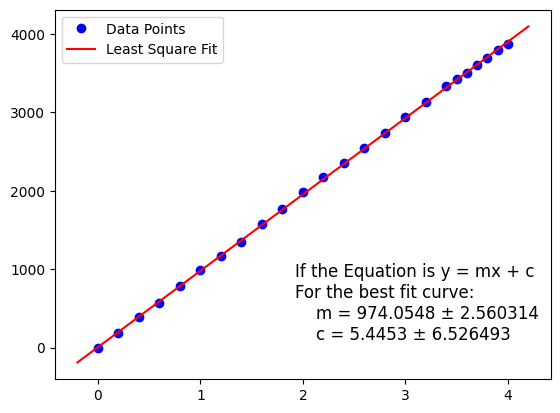

In [10]:
def straight_line(x, m, c): return m*x + c

b_cal = np.array([0, 188, 389, 568, 780, 988, 1170, 1350, 1580, 1770, 1980, 2170, 2360, 2540, 2740, 2940, 3130, 3340, 3420, 3500, 3600, 3690, 3790, 3870])
i_cal = np.array([0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3, 3.2, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4])
popt, pcov = curve_fit(straight_line, i_cal, b_cal)

def get_calibrated_b(i): return popt[0]*i + popt[1]

plotting_function(i_cal, b_cal, '', '', '', pcov, popt)

In [18]:
get_calibrated_b(4)

3901.6647130559145

If the Equation is y = mx + c
For the best fit curve:
    m = 0.0001 ± 2e-06
    c = 0.0001 ± 1.3e-05

The curve looks like:


(6.095607795173019e-05, 6.23510152284459e-05)

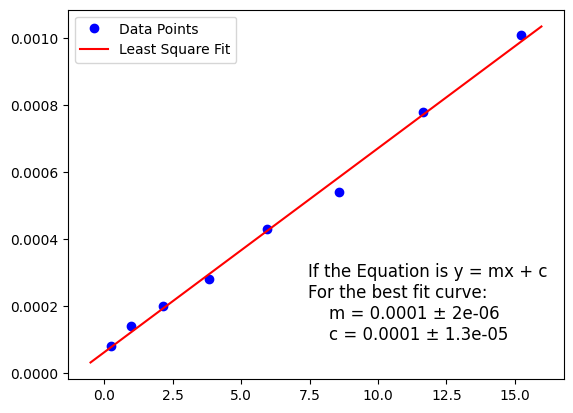

In [63]:
i = np.arange(0.5, 4.5, 0.5)
b = get_calibrated_b(i)*10e-4
b2 = np.power(b, 2)

height_0 = 7.896
heights = np.array([7.904, 7.910, 7.916, 7.924, 7.939, 7.950, 7.974, 7.997])
h = (heights - height_0)/100  # difference

popt1, pcov1 = curve_fit(straight_line, b2, h)

plotting_function(b2, h, '', '', '', pcov1, popt1)
popt1[0], popt1[1]

In [61]:
chi = popt1[0]*4*9.81*4*np.pi*10e-7*(rho-1.29)

mass_chi = chi/rho
molar_chi = mass_chi*169/1000

chi, mass_chi, molar_chi

(3.8831034243146806e-05, 3.002772523771289e-08, 5.074685565173479e-09)